In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('nf.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.shape

(9827, 9)

In [4]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [5]:
df.dtypes

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count             int64
Vote_Average         float64
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
# Summary
.we have a dataframe consisting of 9827 rows and 9 columns.
.In our data no nun and duplicated values.
.Release_date column change in date time obj.
.Overview , original language and poster_url are no need in our project so we drop it.
.There is possibility of outliers in Popularity.
.better categories vote_avg
.Genre column has comma sapperater value and white space that needs to be handled and casted into category.Exploration Summary


SyntaxError: invalid syntax (3353342189.py, line 2)

In [9]:
df.drop(columns=(['Overview','Original_Language','Poster_Url']),inplace=True)

In [10]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [11]:
df['Release_Date']=df['Release_Date'].dt.year

In [12]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# categorizing votes_average columns

WE should cut the vote_average values and make 4 categories popular average below_avg not_popular to describe it more catigorize () function provided above

In [14]:
def catigori(df,col,lables):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [15]:
labels=['flop','average','hit','super_hit']
catigori(df,'Vote_Average',labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,super_hit,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,super_hit,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,average,Thriller
3,2021,Encanto,2402.201,5076,super_hit,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,hit,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,super_hit,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,flop,Horror
9824,2016,The Offering,13.355,94,flop,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,hit,"Music, Drama, History"


In [18]:
df['Vote_Average'].unique()

['super_hit', 'average', 'hit', 'flop', NaN]
Categories (4, object): ['flop' < 'average' < 'hit' < 'super_hit']

In [19]:
df['Vote_Average'].value_counts()

Vote_Average
flop         2467
super_hit    2450
hit          2412
average      2398
Name: count, dtype: int64

In [20]:
df.isnull().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [23]:
df.shape


(9727, 6)

# we split genres into  a list and then explode our data Frame to have only one genre per row ezch movie

In [24]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,super_hit,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,super_hit,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,super_hit,Science Fiction
3,2022,The Batman,3827.658,1151,super_hit,Crime
4,2022,The Batman,3827.658,1151,super_hit,Mystery


# csating column in catigory

In [26]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [28]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# what is most frequent genre of movie ewleased on netflix

In [38]:
sns.set_style('whitegrid')

In [39]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

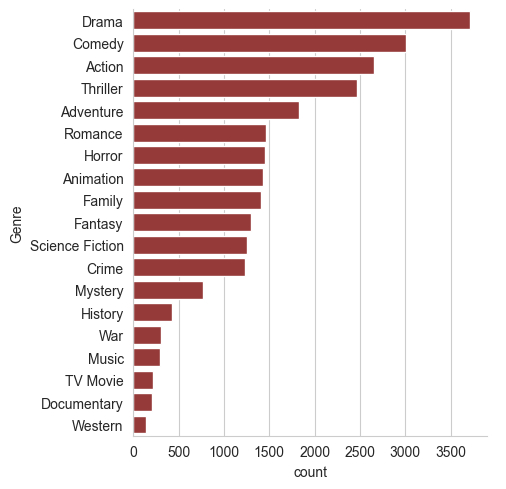

In [56]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='brown')
plt.show()

# highest votes in vot avg column

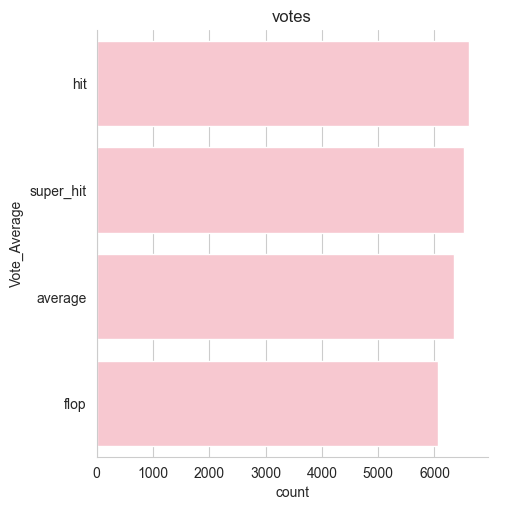

In [60]:
sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='pink')
plt.title('votes')
plt.show()

# which movie get highest popularity and its genre

In [61]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,super_hit,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,super_hit,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,super_hit,Science Fiction


# which movie is the lowest popularity

In [62]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,hit,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,hit,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,hit,History
25549,1984,Threads,13.354,186,super_hit,War
25550,1984,Threads,13.354,186,super_hit,Drama
25551,1984,Threads,13.354,186,super_hit,Science Fiction


# which year has the most filmed movies?

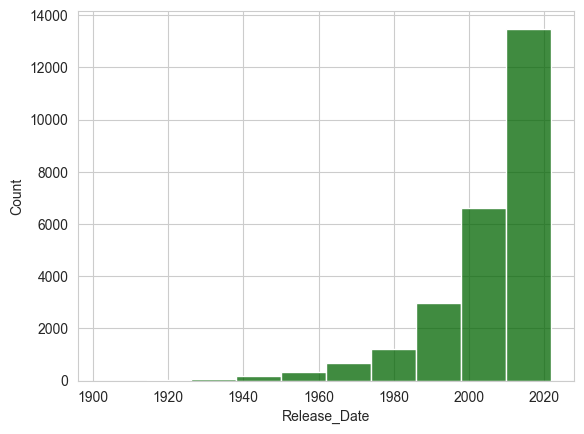

In [75]:
sns.histplot(x='Release_Date',data=df,bins=10,color='darkgreen')
plt.show()

In [77]:
df['Release_Date'].value_counts().max()

np.int64(1636)

In [82]:

max_year = df['Release_Date'].value_counts().idxmax()
max_count = df['Release_Date'].value_counts().max()

print(f"Year with the most movie releases: {max_year} ({max_count} movies)")


Year with the most movie releases: 2021 (1636 movies)
